In [6]:
import requests

REST_API_KEY = '2fa4da0b370eee3234c565b78ecff325'
# url Ïùò ? Îí§Ï™ΩÏùÄ ÏøºÎ¶¨ ÌååÎùºÎØ∏ÌÑ∞
# keywordÏùò Ï£ºÎ≥Ä Î∞òÍ≤Ω 1km ÎÇ¥Ïùò ÎßõÏßë Ï∞æÍ∏∞
KEYWORD_LOCAL_URL = 'https://dapi.kakao.com/v2/local/search/keyword.json?query={}&radius=1000'

keywords=['ÏÑúÏö∏Ïó≠', 'ÌôçÎåÄÏûÖÍµ¨Ïó≠']

In [7]:
# header Ïóê Ïù∏Ï¶ù Ï†ïÎ≥¥ Ï∂îÍ∞Ä (ÏïàÌïòÎ©¥ 401 error)
headers = {
    'Authorization' : f'KakaoAK {REST_API_KEY}'
}
response = requests.get(KEYWORD_LOCAL_URL.format(keywords[1] + 'ÎßõÏßë'), headers=headers)
response

<Response [200]>

In [ ]:
import time
all_data=[]
# ÎÇòÎ®∏ÏßÄ ÌéòÏù¥ÏßÄ Î∞è ÌÇ§ÏõåÎìúÏóê ÎåÄÌïú Îç∞Ïù¥ÌÑ∞Î•º Í∞ÄÏ†∏Ïò§Í∏∞
for keyword in keywords:
    for page in range(1, 6):  # 1ÌéòÏù¥ÏßÄÎ∂ÄÌÑ∞ 5ÌéòÏù¥ÏßÄÍπåÏßÄ Î∞òÎ≥µ
        # Ï≤´ Î≤àÏß∏ ÌÇ§ÏõåÎìúÏùò Ï≤´ ÌéòÏù¥ÏßÄÎäî Ïù¥ÎØ∏ ÏöîÏ≤≠ÎêòÏóàÏúºÎØÄÎ°ú Í±¥ÎÑàÎúÅÎãàÎã§.
        if keyword == keywords[0] or page == 1:
            continue
        params = {
            'page': page,
            'size': 15  # ÌéòÏù¥ÏßÄÎãπ Í≤∞Í≥º Ïàò
        }
        response = requests.get(KEYWORD_LOCAL_URL.format(keyword + ' ÎßõÏßë'), headers=headers, params=params)
        if response.status_code == 200:
            data = response.json().get('documents', [])
            if not data:  # Îçî Ïù¥ÏÉÅ Îç∞Ïù¥ÌÑ∞Í∞Ä ÏóÜÏúºÎ©¥ Ï§ëÏßÄ
                break
            all_data.extend(data)  # Îç∞Ïù¥ÌÑ∞Î•º Î¶¨Ïä§Ìä∏Ïóê Ï∂îÍ∞Ä
        else:
            print(f"Error fetching data for {keyword} page {page}: {response.status_code}")
            break
        time.sleep(2)  # Ïõπ ÌéòÏù¥ÏßÄ Î°úÎìúÎ•º Î≥¥Ïû•ÌïòÍ∏∞ ÏúÑÌï¥ 2Ï¥à Ïâ¨Í∏∞
# ÏàòÏßëÎêú Î™®Îì† Îç∞Ïù¥ÌÑ∞Î•º Ï∂úÎ†•
for place in all_data:
    print({
        'address_name': place['address_name'],
        'id': place['id'],
        'place_name': place['place_name'],
    })

In [10]:
len(all_data)

60

## comment ÏàòÏßëÌïòÍ∏∞

In [11]:
# Í∞Å Í∞ÄÍ≤åÏóê Î∂ÄÏó¨Îêú idÏôÄ ÎßàÏßÄÎßâ comment id Î•º ÎÑ£ÏùÑ Ïàò ÏûàÍ≤å format ÏÇΩÏûÖ
COMMENT_URL = "https://place.map.kakao.com/m/commentlist/v/{}/{}?order=USEFUL&onlyPhotoComment=false"

In [12]:
# Í∞ÄÍ≤å id Ï∂îÏ∂ú
ids = [d['id'] for d in all_data]
ids

['1985225055',
 '268235810',
 '27321311',
 '10368349',
 '18257217',
 '25606682',
 '2040780653',
 '15985522',
 '763211643',
 '22300586',
 '24643017',
 '895272833',
 '892514586',
 '10341266',
 '17419272',
 '26311060',
 '11263566',
 '1165755646',
 '308342289',
 '23734945',
 '18742750',
 '8312102',
 '1087043762',
 '934767425',
 '400281849',
 '1719380793',
 '26235884',
 '1226080781',
 '1736742094',
 '1641347883',
 '26311060',
 '11263566',
 '1165755646',
 '308342289',
 '23734945',
 '18742750',
 '8312102',
 '1087043762',
 '934767425',
 '400281849',
 '1719380793',
 '26235884',
 '1226080781',
 '1736742094',
 '1641347883',
 '26311060',
 '11263566',
 '1165755646',
 '308342289',
 '23734945',
 '18742750',
 '8312102',
 '1087043762',
 '934767425',
 '400281849',
 '1719380793',
 '26235884',
 '1226080781',
 '1736742094',
 '1641347883']

In [13]:
len(ids)

60

In [14]:
all_comments = []
for id in ids:
    # Ï≤´ Î≤àÏ®∞ ÏΩîÎ©òÌä∏Ïùò idÎäî Î¨¥Ï°∞Í±¥ 0
    comment_id = 0

    # has_nextÍ∞Ä true Î©¥ ÎßàÏßÄÎßâ ÏΩîÎ©òÌä∏ idÎ•º ÏÉàÎ°≠Í≤å ÎÑ£Ïñ¥ Í≥ÑÏÜç ÌÅ¨Î°§ÎßÅ
    has_next = True

    while has_next:
        # ÏàòÏßëÌï¥Ïïº Ìï† url ÏÑ§Ï†ï
        SCRAP_COMMENT_URL = COMMENT_URL.format(id, comment_id)
        # ÎßåÎì§Ïñ¥ÏßÑ urlÎ°ú ÏöîÏ≤≠
        response = requests.get(SCRAP_COMMENT_URL)
        comment_data = response.json()['comment']
        # ÎåìÍ∏Ä Îç∞Ïù¥ÌÑ∞ Í∞ÄÏ†∏Ïò§Í∏∞
        comment_list = comment_data['list']
        all_comments.extend(comment_list) # 1Ï∞®Ïõê Î∞∞Ïó¥Î°ú Ï≠â Ïù¥Ïñ¥Î∂ôÏù¥Í∏∞
        # Îã§Ïùå ÌéòÏù¥ÏßÄ Ï°¥Ïû¨ Ïó¨Î∂Ä ÌôïÏù∏
        has_next = comment_data['hasNext']
        # has_next Í∞Ä True Ïù∏ Í≤ΩÏö∞ ÎßàÏßÄÎßâ ÏΩîÎ©òÌä∏Ïùò idÎ•º comment_idÎ°ú ÏÑ§Ï†ï
        if has_next:
            comment_id = comment_list[-1]['commentid']

        print(comment_list)

all_comments

[{'commentid': '10785721', 'contents': 'ÎÑàÎ¨¥Ï¢ãÏïÑÏöî', 'point': 5, 'username': 'Ï°∞Î™ÖÏû¨', 'profile': 'http://th-p.talk.kakao.co.kr/th/talkp/wk77qVpufD/Hc15eem4f7pO0xyRnW86X1/ao6s5m.jpg', 'profileStatus': 'S', 'photoCnt': 0, 'likeCnt': 0, 'kakaoMapUserId': '1073189888', 'photoList': [], 'ownerReply': {}, 'userCommentCount': 1, 'userCommentAverageScore': 5.0, 'myStorePick': False, 'level': {'nowLevel': 2, 'badge': '01'}, 'date': '2024.08.16.', 'isMy': False, 'isBlock': False, 'isEditable': False, 'isMyLike': False}, {'commentid': '10785524', 'contents': 'Ï°∞ÏÑ†ÏãúÎåÄ ÎäêÎÇå Îß§Ïö∞ Ï¢ãÏïÑÏöî!', 'point': 5, 'username': '„Öá„Öá', 'profile': 'http://t1.daumcdn.net/local/kakaomapPhoto/profile/290e702a9587b7a3f08a0f123698cfb24e2e48ac?original', 'profileStatus': 'S', 'photoCnt': 2, 'likeCnt': 0, 'thumbnail': 'http://t1.daumcdn.net/local/kakaomapPhoto/review/578d951df734e54bb3cb510e8a25cb9b50d3efc2?original', 'kakaoMapUserId': '792261649', 'photoList': [{'url': 'http://t1.daumcdn.net/local/

KeyError: 'comment'

In [15]:
len(all_comments)

2741

In [16]:
import pandas as pd

comment_df = pd.DataFrame(all_comments)
comment_df_filtered = comment_df[['contents', 'point']]
comment_df_filtered

contents  point
0                                      ÎÑàÎ¨¥Ï¢ãÏïÑÏöî      5
1                            Ï°∞ÏÑ†ÏãúÎåÄ ÎäêÎÇå Îß§Ïö∞ Ï¢ãÏïÑÏöî!      5
2                               ÎßõÏûàÏñ¥Ïöî ÍµøÏù¥ÏóêÏöî ÏµúÍ≥†      5
3                          Î≥ÑÏ†ê ÌèâÍ∑† 5.0 500Î™Ö Ïù¥ÏÉÅ      1
4              ÎÑòÎØÄ ÎßõÏûàÏñ¥Ïöî\nÏ°∞ÏÑ†ÏãúÎåÄÏóê ÏñëÎ∞òÏù¥ ÎêòÏñ¥Î≤ÑÎ¶∞Í≤É Í∞ôÏïÑÏöî!      5
...                                      ...    ...
2736       ÏôÄ.... Îèà ÎßéÏùÑ Îïå ÏôÄÏïºÍ≤†ÎÑ§. ÎÑò ÎπÑÏã∏Í≥† ÏñëÎèÑ Ï†ÅÏñ¥ÏÑú.       1
2737  Ïó¨Í∏∞Í∞Ä Ïπ¥Í¥ëÏù¥ÎûÄ Î≥ÑÎ™ÖÏùÑ Ïì∞Îäî ÎßåÌôîÍ∞ÄÍ∞Ä ÏóÖÏßÑÏÇ¥ Ïù∏Ï¶ùÏùÑ ÌñàÎçò ÏãùÎãπÏûÖÎãàÍπå?      5
2738            Ï†àÏπú, Ïó∞Ïù∏Í≥º Ï°∞Ïö©ÌïòÍ≤å Îì±Ïã¨Í≥º ÏôÄÏù∏ Ï¶êÍ∏∞Í∏∞ Ï¢ãÏïÑÏöî.      5
2739                                  Îî± ÏÑ∏Î≤àÍ∞îÎã§      2
2740                                     NaN      3

[2741 rows x 2 columns]

<Axes: xlabel='point'>

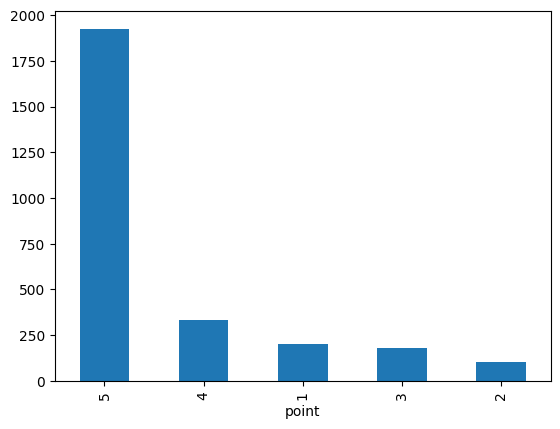

In [17]:
comment_df_filtered['point'].value_counts().plot(kind='bar')

In [60]:
pip install openpyxl

   ---------------------------------------- 0.0/250.9 kB ? eta -:--:--
   --------------------------------------- 250.9/250.9 kB 15.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [18]:
comment_df_filtered.to_excel('comments_hongdae.xlsx', index=False)